In [39]:
import os
from re import X

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
path = r"C:\Users\aliss\Documents\GitHub\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
#Definimos dataset
X = df.iloc[:,:4]
X.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


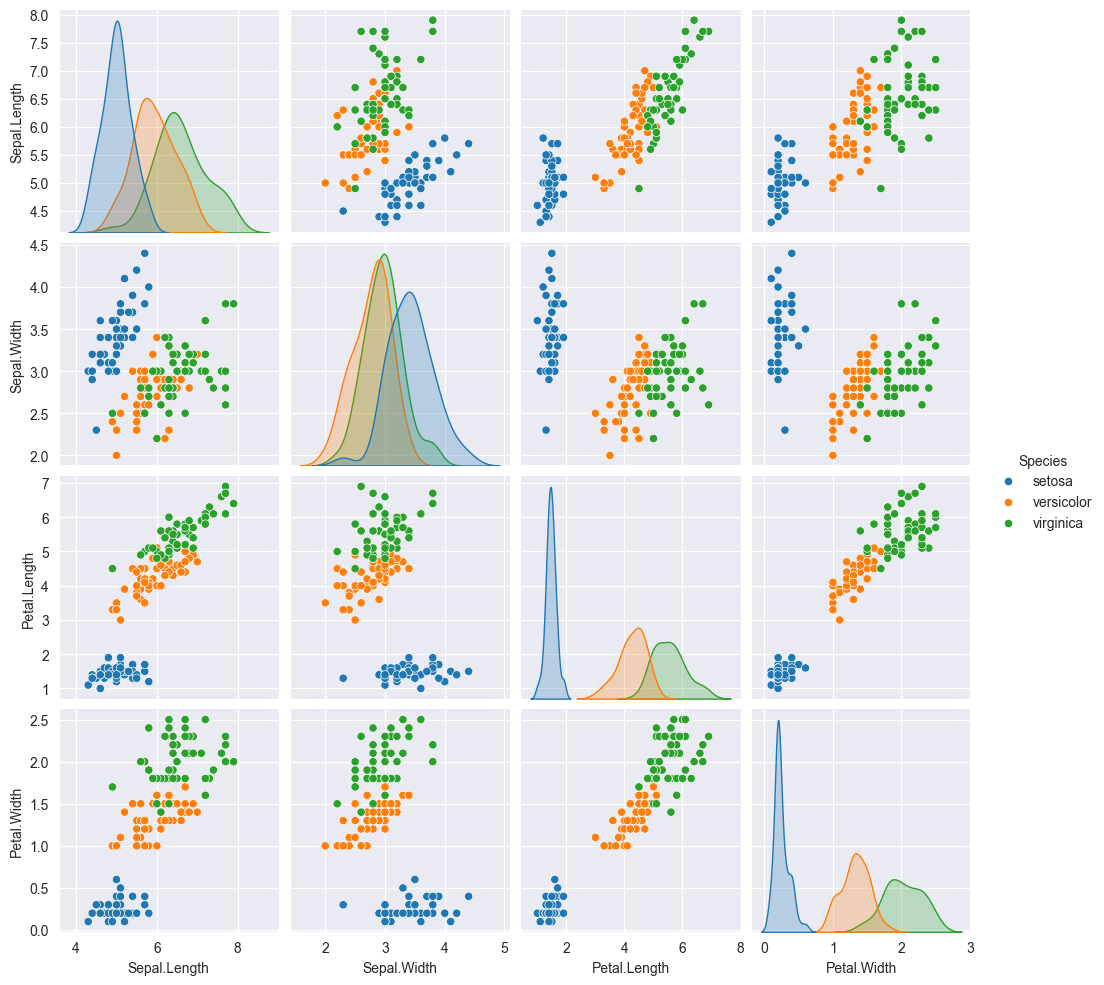

In [41]:
import seaborn as sns
sns.pairplot(df, hue="Species") #el hue es un color. Aquí le decimos que separe los grupos de especies en dif colores


In [42]:
# Determinar vectores y valores propios, calcular la matriz y matriz de covarianza
# Porcentaje de aporte 
# Con cuantas variables alcanzo un 85% 

Normalizamos dataframe

In [43]:
media, sigma = X.mean(axis=0), X.std(axis=0)
X_std = (X - media) / sigma

In [44]:
X_std.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [45]:
X_std.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-5.684342e-16,-7.815970e-16,-2.842171e-16,-3.789561e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


# Calculamos matriz de covarianza

In [46]:
cov_matrix = (X_std - X_std.mean(axis=0)).T.dot((X_std - X_std.mean(axis=0)))/(X_std.shape[0]-1)
cov_matrix

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [47]:
np.cov(x_std.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# Calculamos los valores y vectores propios

In [48]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [49]:
eig_vals, eig_vectors = np.linalg.eig(np.cov(X_std.T))
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


# Calculamos el porcentaje de cada vector propio

In [50]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(np.float64(2.9184978165319957),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9140304714680705),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.14675687557131534),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.020714836428619206),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [51]:
# Ordenamos de mayor a menor
eigen_pairs.sort(reverse=True)

# Calculamos los porcentajes
total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [52]:
print('El porcentaje de información que cada valor propio aporta es:')
var_exp

El porcentaje de información que cada valor propio aporta es:


[np.float64(72.96244541329987),
 np.float64(22.850761786701757),
 np.float64(3.6689218892828825),
 np.float64(0.5178709107154801)]

In [53]:
print('El porcentaje de información acumulado es:')
cum_var_exp

El porcentaje de información acumulado es:


array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

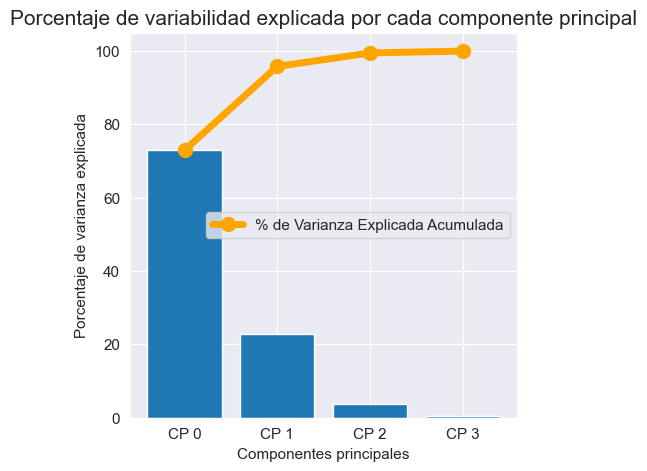

In [54]:
plt.figure(figsize=(5, 5))

x=["CP %s"%i for i in range(len(var_exp))]

plt.bar(x, var_exp)
plt.plot(x, cum_var_exp, '.-', label="% de Varianza Explicada Acumulada", c='orange', linewidth=5, markersize=20)

plt.xlabel("Componentes principales", fontsize=11)
plt.ylabel("Porcentaje de varianza explicada", fontsize=11)
plt.title("Porcentaje de variabilidad explicada por cada componente principal", fontsize=15)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.legend(loc='best', fontsize=11)

# Creando la matriz que representa la transformación lineal

In [55]:
eigen_pairs

[(np.float64(2.9184978165319957),
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (np.float64(0.9140304714680705),
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (np.float64(0.14675687557131534),
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (np.float64(0.020714836428619206),
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [56]:
eigen_pairs[0][1], eigen_pairs[1][1]

(array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]),
 array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))

In [57]:
T_matrix = np.stack((eigen_pairs[0][1], eigen_pairs[1][1]), axis=1)
T_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [58]:
espacio_proyectado = []

for idx in range(len(X)):
    vec = X.iloc[idx, :] # vector en R4
    Tvec = T_matrix.T.dot(vec) # proyección del espacio de 4D a 2D
    espacio_proyectado.append(Tvec)

In [59]:
# Convertimos la lista en array
espacio_proyectado_np = np.array(espacio_proyectado)

In [60]:
espacio_proyectado_np

array([[ 2.64026976, -5.2040413 ],
       [ 2.6707303 , -4.66690995],
       [ 2.45460631, -4.77363639],
       [ 2.54551709, -4.64846339],
       [ 2.56122842, -5.2586291 ],
       [ 2.97594579, -5.70732073],
       [ 2.4631572 , -4.92969712],
       [ 2.67313922, -5.07641913],
       [ 2.43713208, -4.38587157],
       [ 2.64535121, -4.75499447],
       [ 2.80076135, -5.50437488],
       [ 2.62696735, -5.00338477],
       [ 2.56213805, -4.62247398],
       [ 2.12748116, -4.42641769],
       [ 2.75425956, -5.92498314],
       [ 2.88150922, -6.27729552],
       [ 2.74378055, -5.69752408],
       [ 2.69675541, -5.2107355 ],
       [ 3.10271466, -5.72152225],
       [ 2.67399249, -5.49017336],
       [ 2.9976482 , -5.2322845 ],
       [ 2.75741289, -5.40453799],
       [ 2.12063682, -5.09786541],
       [ 3.03772014, -5.04681224],
       [ 2.80109128, -5.01073225],
       [ 2.83891951, -4.70955003],
       [ 2.84415184, -5.09225669],
       [ 2.75041766, -5.24423222],
       [ 2.71931109,

In [61]:
Y = X.dot(T_matrix) 
Y

,0,1
0,2.640270,-5.204041
1,2.670730,-4.666910
2,2.454606,-4.773636
3,2.545517,-4.648463
4,2.561228,-5.258629
...,...,...
145,7.000417,-5.579908
146,6.584640,-4.935618
147,6.726747,-5.484342
148,6.748228,-5.765416


In [62]:
espacio_proyectado_np.shape

(150, 2)

# Método de pca

In [64]:
#from sklearn.decomposition import PCA

#